In [2]:
import pandas as pd
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm
import os

In [3]:
# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [4]:
# Load your CSV
# Tokens too big in opoen ai
'''
plane_df = pd.read_csv('openai_results_plane.csv', index_col=0)
plane_df.rename(columns={'img_id': 'image_id'}, inplace=True)
ship_df = pd.read_csv('openai_results_ship.csv')
ship_df.rename(columns={'img_id': 'image_id'}, inplace=True)
plane_context = plane_df[plane_df['prompt']=='Describe every item in the image']
ship_context = ship_df[ship_df['prompt']=='Describe every item in the image']
context_df = pd.concat([plane_context,ship_context])
print(context_df.columns)
print(context_df['prompt'].unique())
context_df.head()
'''
prompt_results_df = pd.read_csv('C:/Users/neals/Desktop/practicum/prompt_results_classification.csv')
prompt_results_df['prompt'] = prompt_results_df['prompt'].fillna('')
prompt_results_df.prompt.unique()
context_df = prompt_results_df[prompt_results_df['prompt']=='']
context_df.head()


image_id   image_file                                         image_path  \
0          1  P0003_0.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
17         2  P0003_1.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
34         3  P0003_2.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
51         4  P0003_3.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   
68         5  P0003_4.png  E:/datasets/DOTA_dataset_512/val/images/P0003_...   

   prompt                                     generated_text  category  \
0          an aerial view of a parking lot with several y...         1   
17         an aerial view of yellow school buses parked i...         1   
34         an aerial view of a road with a yellow school ...         1   
51         an aerial view of yellow school buses parked i...         1   
68         an aerial view of yellow school buses parked i...         1   

    processing_time  
0          2.130118  
17         1.085106  
34         1.149868  
51         1.006406  
68         1.092633

In [5]:
# Function to get combined embeddings
def get_combined_embedding(image_path, description, processor):
    # Load image
    image = Image.open(image_path)
    
    # Process image and text
    inputs = processor(text=description, images=image, return_tensors="pt", padding=True, truncation=True, max_length=77)
    
    # Get embeddings
    with torch.no_grad():
        outputs = model(**inputs)
        image_embedding = outputs.image_embeds
        text_embedding = outputs.text_embeds
    
    # Concatenate embeddings
    combined_embedding = torch.cat((image_embedding, text_embedding), dim=1)
    return combined_embedding.squeeze().cpu().numpy()

In [6]:
# Process each row and save embedding
for idx, row in tqdm(context_df.iterrows(), total=len(context_df), desc="Processing images"):
    #img_name = row.image_file.split('.')[0]
    embedding_path = f"embeddings/{idx}_embedding.npy"
    # Skip if embedding already exists
    if os.path.exists(embedding_path):
        print(f'skipping image at {idx} {row.image_file} already has an embedding file')
        continue
    # Generate embedding and save
    embedding = get_combined_embedding(row['image_path'], row['generated_text'], processor)
    np.save(embedding_path, embedding)



Processing images:  24%|██▎       | 1833/7750 [00:00<00:00, 9171.89it/s]

skipping image at 0 P0003_0.png already has an embedding file
skipping image at 17 P0003_1.png already has an embedding file
skipping image at 34 P0003_2.png already has an embedding file
skipping image at 51 P0003_3.png already has an embedding file
skipping image at 68 P0003_4.png already has an embedding file
skipping image at 85 P0003_5.png already has an embedding file
skipping image at 102 P0003_6.png already has an embedding file
skipping image at 119 P0003_7.png already has an embedding file
skipping image at 136 P0003_8.png already has an embedding file
skipping image at 153 P0004_0.png already has an embedding file
skipping image at 170 P0004_1.png already has an embedding file
skipping image at 187 P0004_2.png already has an embedding file
skipping image at 204 P0004_3.png already has an embedding file
skipping image at 221 P0004_4.png already has an embedding file
skipping image at 238 P0004_5.png already has an embedding file
skipping image at 255 P0004_6.png already has a

Processing images:  49%|████▊     | 3760/7750 [00:00<00:00, 9526.30it/s]

skipping image at 30920 P0904_2.png already has an embedding file
skipping image at 30937 P0904_4.png already has an embedding file
skipping image at 30954 P0904_5.png already has an embedding file
skipping image at 30971 P0904_7.png already has an embedding file
skipping image at 30988 P0904_8.png already has an embedding file
skipping image at 31005 P0910_0.png already has an embedding file
skipping image at 31022 P0910_1.png already has an embedding file
skipping image at 31039 P0910_2.png already has an embedding file
skipping image at 31053 P0910_3.png already has an embedding file
skipping image at 31070 P0910_6.png already has an embedding file
skipping image at 31086 P0910_7.png already has an embedding file
skipping image at 31103 P0910_8.png already has an embedding file
skipping image at 31120 P0910_9.png already has an embedding file
skipping image at 31137 P0910_10.png already has an embedding file
skipping image at 31154 P0910_11.png already has an embedding file
skipping

Processing images:  61%|██████    | 4724/7750 [00:00<00:00, 9567.24it/s]

skipping image at 61481 P1390_93.png already has an embedding file
skipping image at 61498 P1390_94.png already has an embedding file
skipping image at 61512 P1390_95.png already has an embedding file
skipping image at 61529 P1390_96.png already has an embedding file
skipping image at 61546 P1390_97.png already has an embedding file
skipping image at 61563 P1390_98.png already has an embedding file
skipping image at 61579 P1390_99.png already has an embedding file
skipping image at 61596 P1390_100.png already has an embedding file
skipping image at 61613 P1390_101.png already has an embedding file
skipping image at 61630 P1390_102.png already has an embedding file
skipping image at 61647 P1390_103.png already has an embedding file
skipping image at 61663 P1390_104.png already has an embedding file
skipping image at 61680 P1390_105.png already has an embedding file
skipping image at 61697 P1390_106.png already has an embedding file
skipping image at 61714 P1390_107.png already has an em

Processing images:  85%|████████▌ | 6588/7750 [00:00<00:00, 8563.76it/s]

skipping image at 90916 P1983_10.png already has an embedding file
skipping image at 90933 P1983_11.png already has an embedding file
skipping image at 90950 P1992_0.png already has an embedding file
skipping image at 90967 P1992_1.png already has an embedding file
skipping image at 90984 P1992_2.png already has an embedding file
skipping image at 91001 P1992_3.png already has an embedding file
skipping image at 91018 P1992_4.png already has an embedding file
skipping image at 91035 P1992_5.png already has an embedding file
skipping image at 91052 P1992_6.png already has an embedding file
skipping image at 91069 P1992_7.png already has an embedding file
skipping image at 91086 P1992_8.png already has an embedding file
skipping image at 91103 P1992_9.png already has an embedding file
skipping image at 91120 P1992_10.png already has an embedding file
skipping image at 91137 P1992_11.png already has an embedding file
skipping image at 91154 P1992_12.png already has an embedding file
skipp

Processing images: 100%|██████████| 7750/7750 [00:00<00:00, 9048.43it/s]

skipping image at 118292 P2758_105.png already has an embedding file
skipping image at 118308 P2758_106.png already has an embedding file
skipping image at 118325 P2758_107.png already has an embedding file
skipping image at 118339 P2758_118.png already has an embedding file
skipping image at 118355 P2758_119.png already has an embedding file
skipping image at 118372 P2758_120.png already has an embedding file
skipping image at 118389 P2758_123.png already has an embedding file
skipping image at 118406 P2758_124.png already has an embedding file
skipping image at 118423 P2758_125.png already has an embedding file
skipping image at 118436 P2758_134.png already has an embedding file
skipping image at 118448 P2758_135.png already has an embedding file
skipping image at 118462 P2758_141.png already has an embedding file
skipping image at 118479 P2758_142.png already has an embedding file
skipping image at 118495 P2758_143.png already has an embedding file
skipping image at 118508 P2758_144

In [7]:
context_df['embedding'] = context_df.index.map(lambda idx: np.load(f"embeddings/{idx}_embedding.npy"))

C:\Users\neals\AppData\Local\Temp\ipykernel_15992\3541906023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  context_df['embedding'] = context_df.index.map(lambda idx: np.load(f"embeddings/{idx}_embedding.npy"))


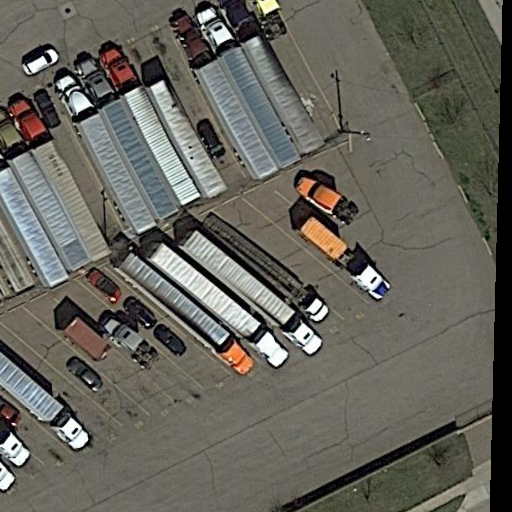

In [8]:
# Function to find top-k similar images
def find_top_k_similar(image_path, description, processor, data, k=5):
    # Get the embedding for the new image and description
    query_embedding = get_combined_embedding(image_path, description, processor)
    
    # Stack embeddings and calculate similarities
    embeddings = np.stack(data['embedding'].values)
    similarities = cosine_similarity([query_embedding], embeddings)[0]
    
    # Find top-k indices
    top_k_indices = similarities.argsort()[-k:][::-1]
    top_k_images = data.iloc[top_k_indices]
    
    return top_k_images[['image_path', 'generated_text', 'embedding']]

# Example usage:
image_path = "E:/datasets/DOTA_dataset_512/train/images/P0011_7.png"
description = "A photo of red, orange, white, gray, and black trucks and cars in a parking lot"
# image_path = "E:/datasets/DOTA_dataset_512/train/images/P0020_34.png"
# description = "A photo of yellow parked car near trees, water and a dock"
#image_path = "E:/datasets/DOTA_dataset_512/train/images/P2641_87.png"
#description = "A photo of a orange container ship"
# image_path = "E:/datasets/DOTA_dataset_512/train/images/P2644_87.png"
# description = "A photo of a wind turbine near trees"
# description = "A photo of a storage tank near trees"
top_k_images = find_top_k_similar(image_path, description, processor, context_df, k=10)
img = Image.open(image_path)
display(img)

# TODO just a text embedding search for aircraft carries

Processing images:   0%|          | 0/7750 [00:00<?, ?it/s]

E:/datasets/DOTA_dataset_512/val/images/P0007_2.png
an aerial view of several trucks parked in a parking lot



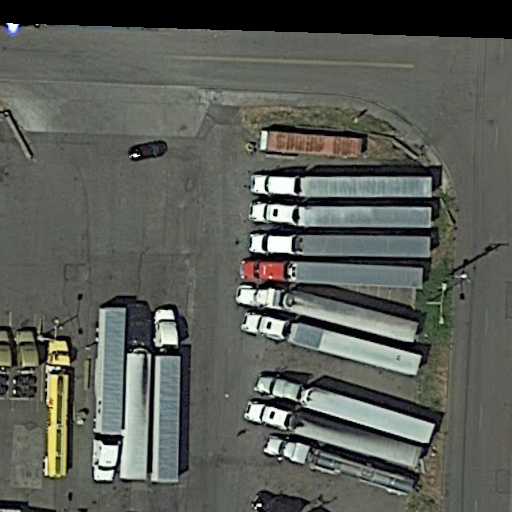

E:/datasets/DOTA_dataset_512/val/images/P0007_3.png
an aerial view of trucks parked in a parking lot



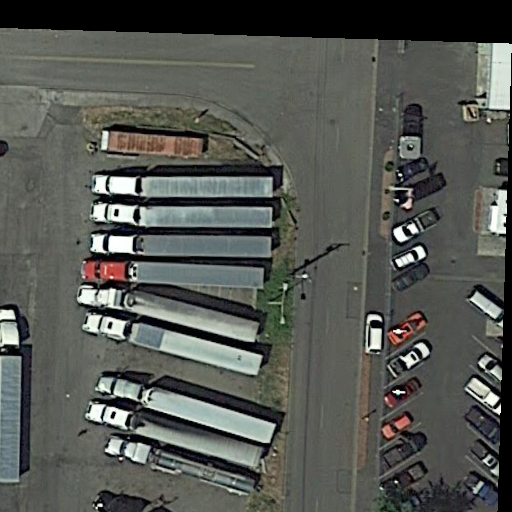

Processing images:   0%|          | 2/7750 [00:00<10:39, 12.11it/s]

E:/datasets/DOTA_dataset_512/val/images/P1434_10.png
an aerial view of several trucks parked in a parking lot



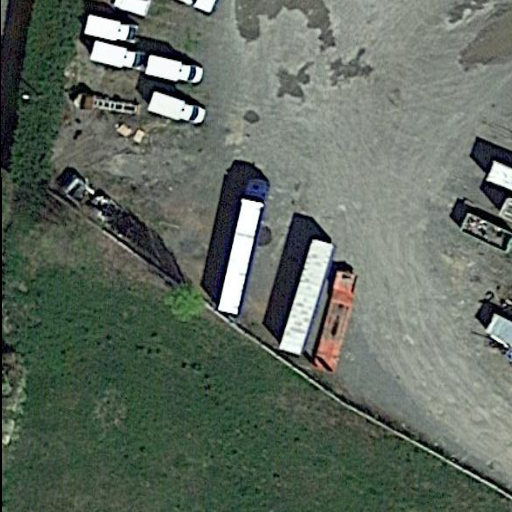

E:/datasets/DOTA_dataset_512/val/images/P0476_1.png
an aerial view of a parking lot with trucks and cars



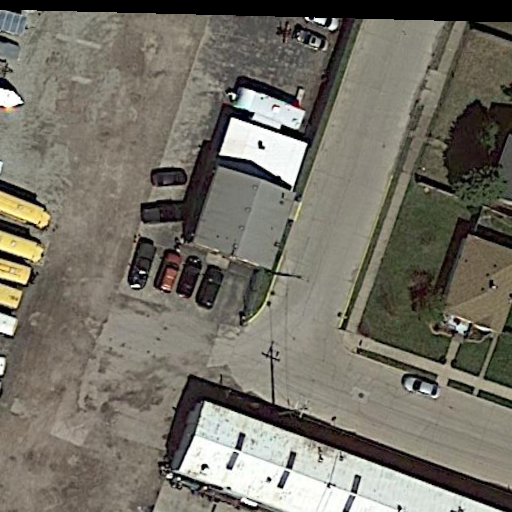

Processing images:   0%|          | 4/7750 [00:00<10:14, 12.62it/s]

E:/datasets/DOTA_dataset_512/val/images/P0007_12.png
an aerial view of trucks parked in a parking lot



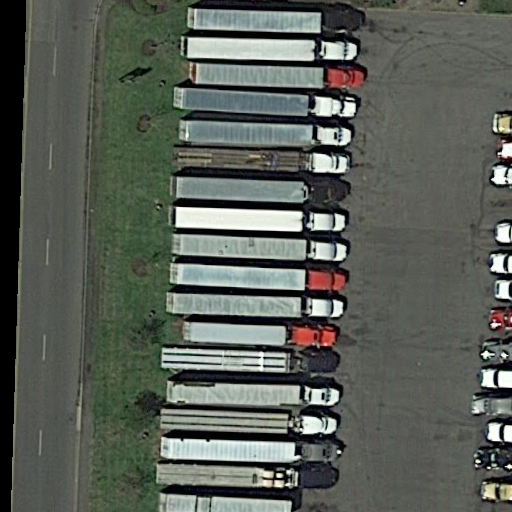

E:/datasets/DOTA_dataset_512/val/images/P0007_11.png
an aerial view of trucks parked in a parking lot



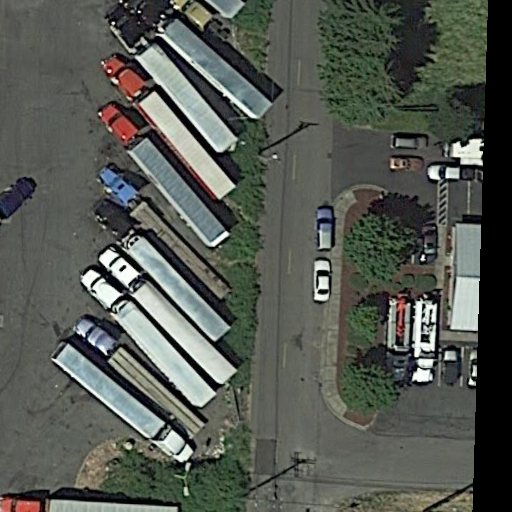

Processing images:   0%|          | 6/7750 [00:00<09:57, 12.96it/s]

E:/datasets/DOTA_dataset_512/val/images/P0007_10.png
an aerial view of trucks parked in a parking lot



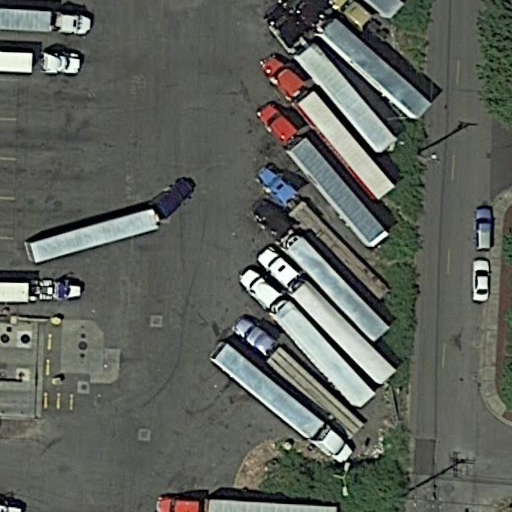

E:/datasets/DOTA_dataset_512/val/images/P0454_3.png
an aerial view of trucks parked in a parking lot



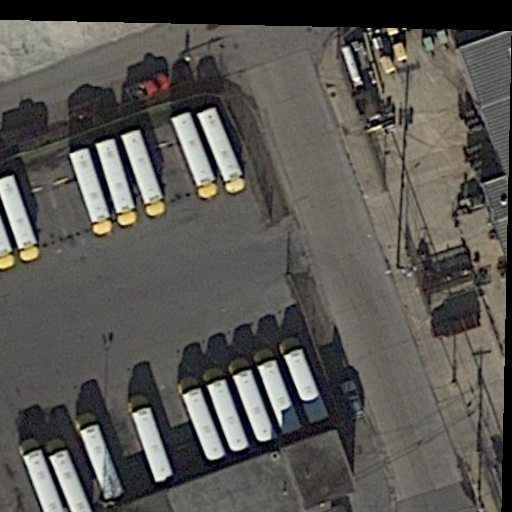

Processing images:   0%|          | 8/7750 [00:00<09:57, 12.97it/s]

E:/datasets/DOTA_dataset_512/val/images/P2779_6.png
an aerial view of several trucks parked in a parking lot



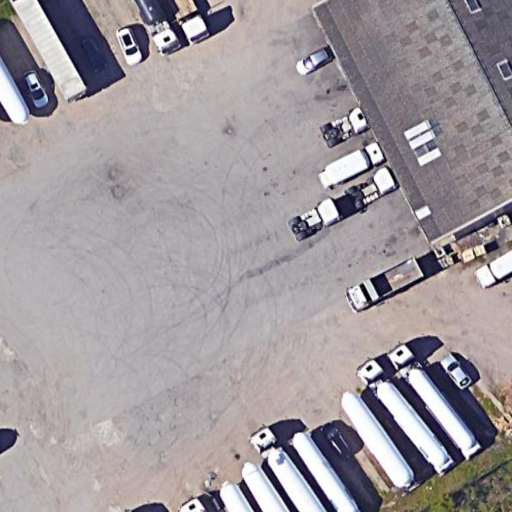

E:/datasets/DOTA_dataset_512/val/images/P0007_13.png
an aerial view of a large group of trucks parked in a parking lot



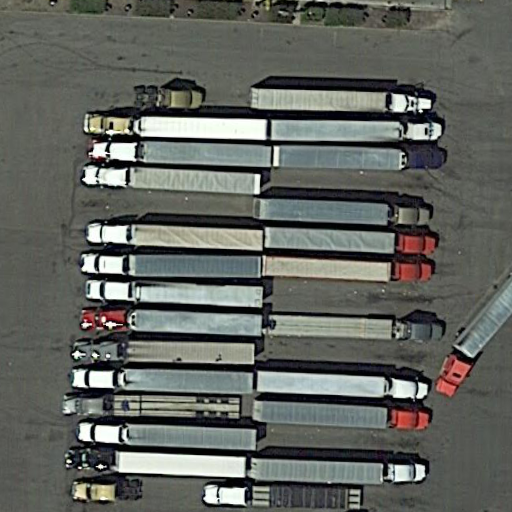

Processing images:   0%|          | 10/7750 [00:00<10:07, 12.74it/s]


In [9]:
for idx, row in tqdm(top_k_images.iterrows(), total=len(context_df), desc="Processing images"):
    print(f'{row.image_path}\n{row.generated_text}\n')
    img = Image.open(row.image_path)
    display(img)